In [104]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Wczytanie danych

In [105]:
data1 = pd.read_csv("data/data_2d.csv")
data2 = pd.read_csv("data/mnist.csv")

Funkcja, generująca wykres dla metody łokciowej

In [106]:
def elbow_method(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    distortion = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        distortion.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), distortion, marker='o')
    plt.title('Metoda łokciowa')
    plt.xlabel('Liczba klastrów (K)')
    plt.ylabel('Odległość od wnętrza klastrów')
    plt.show()

Wybór liczby klastrów dla data1

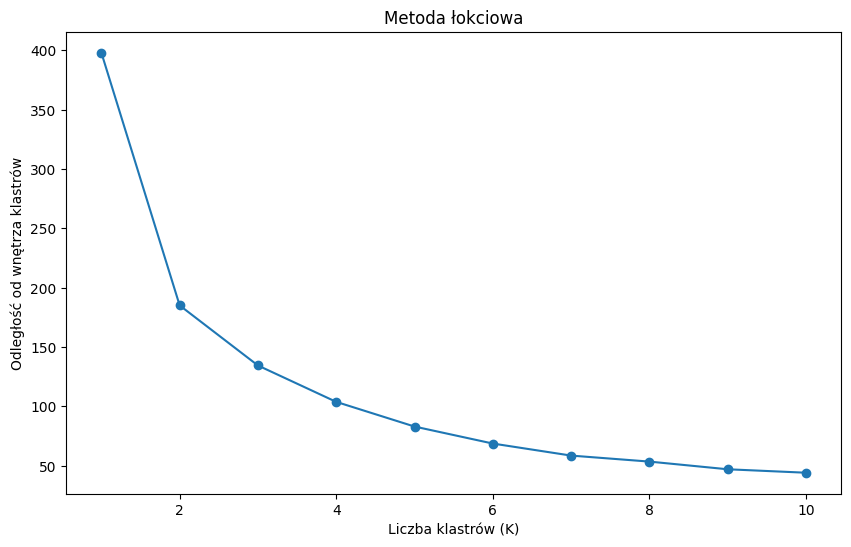

Widać, że dla dwóch klastrów, na wykresie jest przełamanie, zatem jest to optymalna liczba klastrów.


In [107]:
X = data1.iloc[:, [1,2]].values
y = data1.iloc[:, [0]].values

elbow_method(X)

print("Widać, że dla dwóch klastrów, na wykresie jest przełamanie, zatem jest to optymalna liczba klastrów.")

Funkcja generująca wykres grupowania

In [108]:
def print_k_means_for_2d_data(data, labels, centroids):

    # Liczba klastrów
    n_clusters = len(centroids)

    # Kolory dla punktów
    cmap = plt.get_cmap('tab10')  # Kolory mapy
    colors = [cmap(label % 10) for label in labels]

    # Adnotacje dla centroidów
    for i in range(n_clusters):
        plt.annotate(f'Centroid {i+1}', (centroids[i, 0], centroids[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', zorder=3)

    # Rysowanie centroidów
    plt.scatter(centroids[:, 0], centroids[:, 1], c="green", label="Centroidy", marker="X", s=200, edgecolors="k", zorder=2)

    # Rysowanie punktów
    plt.scatter(data[:, 0], data[:, 1], c=colors, label="Punkty", alpha=0.6, edgecolors="w", s=100, zorder=1)

    # Szczegóły wykresu
    plt.xlabel("Cecha 1")
    plt.ylabel("Cecha 2")
    plt.title("Wizualizacja klasteryzacji algorytmem K-średnich")
    plt.legend()
    plt.grid(True)
    plt.show()

Wizualizacja grupowania dla data1

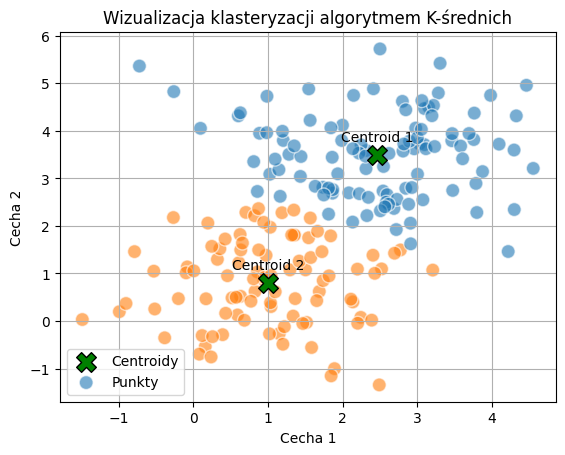

In [109]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_k_means_for_2d_data(X, labels, centroids)

Zmniejszenie liczby wymiarów dla data2

Explained variance by component: [0.07297869 0.05215213]
Cumulative explained variance: 0.1251308226200651
MSE on original data: 54.46998645239266
MSE on PCA-transformed data: 6.103791944764001


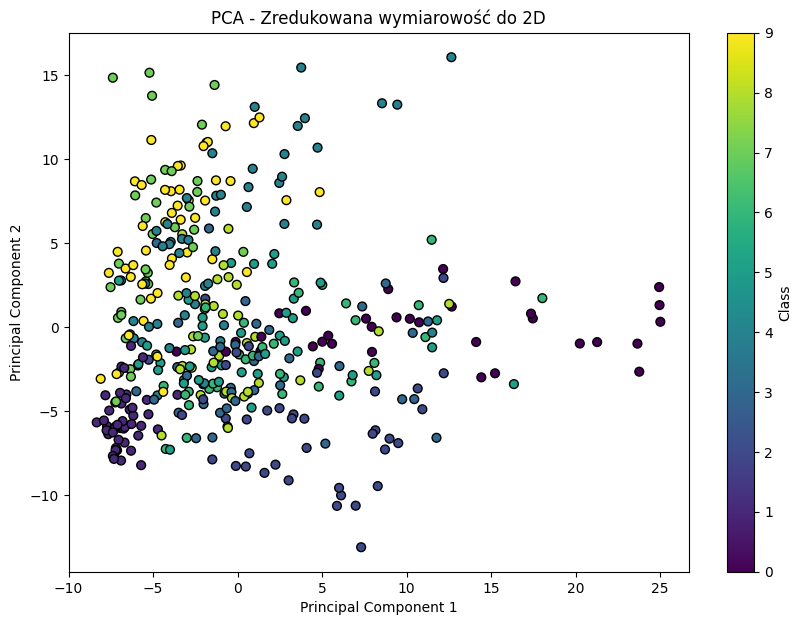

In [110]:
X = data2.iloc[:, 1:].values
y = data2.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.sum(explained_variance_ratio)
print("Explained variance by component:", explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

original_model = LinearRegression()
pca_model = LinearRegression()

original_model.fit(X_train_scaled, y_train)
y_pred_original = original_model.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
print(f"MSE on original data: {mse_original}")

pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"MSE on PCA-transformed data: {mse_pca}")

# Wizualizacja danych w przestrzeni 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA - Zredukowana wymiarowość do 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

Wybór liczby klastórw dla data2

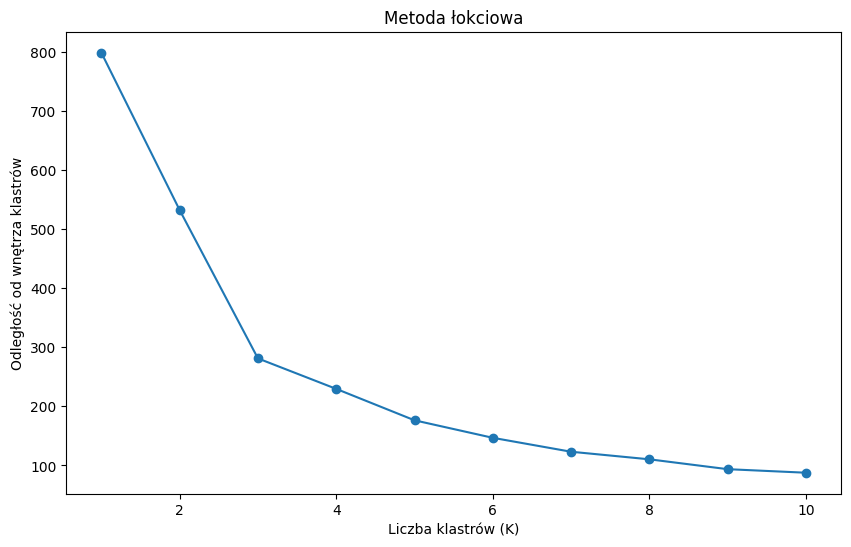

Widać, że dla trzech klastrów, na wykresie jest przełamanie, zatem jest to optymalna liczba klastrów.


In [111]:
X = X_train_pca
y = y_train

elbow_method(X)

print("Widać, że dla trzech klastrów, na wykresie jest przełamanie, zatem jest to optymalna liczba klastrów.")

Wizualizacja grupowania dla data2

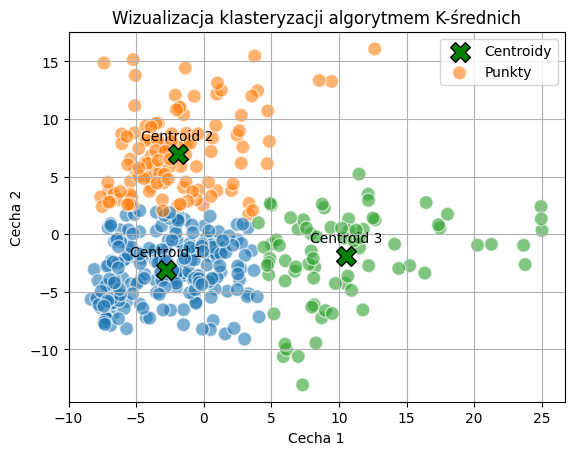

In [112]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_k_means_for_2d_data(X, labels, centroids)